In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


This line of code is responsible for loading the CIFAR-10 dataset and assigning it to four variables: train_images, train_labels, test_images, and test_labels. Here's what each part does:

**datasets.cifar10.load_data():** This function is part of the TensorFlow Keras datasets module. It loads the CIFAR-10 dataset, which is a popular benchmark dataset for image classification tasks. CIFAR-10 contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. This function automatically downloads the dataset if it's not already available locally.

**(train_images, train_labels):** This part of the code is a tuple unpacking operation. The load_data() function returns two tuples: one for the training set and one for the test set. Each tuple contains two elements: the images and their corresponding labels. By using tuple unpacking, we assign the images to train_images and the labels to train_labels.

**(test_images, test_labels):** Similar to the previous tuple, this part of the code assigns the test images to test_images and the test labels to test_labels.

So, after executing this line of code, we have four variables:

1. train_images: A numpy array containing the training images.
2. train_labels: A numpy array containing the labels corresponding to the training images.
3. test_images: A numpy array containing the test images.
4. test_labels: A numpy array containing the labels corresponding to the test images.
These variables are then used for training and evaluating machine learning models for image classification tasks using the CIFAR-10 dataset.

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

This line of code is performing a normalization step on the pixel values of the images in the CIFAR-10 dataset.

Normalization is a common preprocessing step in machine learning tasks, particularly in image processing and computer vision. It helps to make training more stable and can lead to faster convergence during training. Additionally, it ensures that the features (pixel values in this case) are on a similar scale, which can help improve the performance of certain machine learning algorithms.

**train_images:** This variable holds a numpy array containing the pixel values of the training images from the CIFAR-10 dataset.

**test_images:** Similarly, this variable contains the pixel values of the test images.

**train_images / 255.0:** Here, each pixel value in the training images is divided by 255.0. This operation scales down the pixel values to a range between 0 and 1. This step is crucial for normalization. By dividing by 255, we're essentially scaling the pixel values to be between 0 and 1 because the original pixel values range from 0 to 255 (as they are 8-bit grayscale or RGB images).

**test_images / 255.0:** Similarly, the pixel values of the test images are also divided by 255.0, ensuring that both the training and test images are normalized in the same way.

In [5]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

C:\Users\Pallvi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


This code defines a Convolutional Neural Network (CNN) model using TensorFlow's Keras API. The architecture defined by this code consists of three convolutional layers followed by max pooling, flattening, and two dense layers. It's a common CNN architecture used for image classification tasks. The ReLU activation function is used to introduce non-linearity, and the final layer produces raw predictions for each class without applying any activation function.

Sequential Model: The Sequential class allows us to create models layer-by-layer. It represents a linear stack of layers.

**1. Convolutional Layers:**

**layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)):** This line adds the first convolutional layer to the model. It has 32 filters, each with a size of 3x3 pixels. The activation function used is ReLU (Rectified Linear Unit). The input_shape parameter specifies the shape of input images, which is (32, 32, 3) for CIFAR-10 images (32x32 pixels with 3 channels for RGB).

**layers.Conv2D(64, (3, 3), activation='relu'):** This line adds the second convolutional layer with 64 filters and a 3x3 filter size. Again, ReLU is used as the activation function.

**layers.Conv2D(64, (3, 3), activation='relu'):** This line adds the third convolutional layer with the same configuration as the second one.

**2. Max Pooling Layers:**

**layers.MaxPooling2D((2, 2)):** These layers perform max pooling with a pool size of 2x2 pixels. Max pooling reduces the spatial dimensions of the input volume, which helps in reducing computation and controlling overfitting.

**3. Flatten Layer:**

**layers.Flatten():** This layer flattens the 3D output from the convolutional layers into a 1D vector. This is necessary to connect the convolutional layers to the fully connected layers.

**4. Dense Layers:**

**layers.Dense(64, activation='relu'):** This line adds a fully connected (dense) layer with 64 neurons and ReLU activation function.

**layers.Dense(10):** This line adds the output layer with 10 neurons, representing the 10 classes in the CIFAR-10 dataset. There is no activation function specified for this layer, which means it will output raw logits.

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

This code block compiles the defined model, specifying the optimizer, loss function, and evaluation metrics. Let's break it down:

**Optimizer:**

**optimizer='adam':** Adam (Adaptive Moment Estimation) is an optimization algorithm commonly used for training neural networks. It adapts the learning rate during training, making it suitable for a wide range of problems. Here, we're using Adam as the optimizer to update the weights of the neural network during training.
Loss Function:

**loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True):** This line specifies the loss function used to compute the difference between the model's predictions and the actual labels during training.
SparseCategoricalCrossentropy is a loss function commonly used for multi-class classification problems where the labels are integers (e.g., 0, 1, 2, ...).
from_logits=True indicates that the model's output logits (raw predictions) are used directly without applying a softmax activation function beforehand. This is often more numerically stable and efficient.

**Metrics:**

**metrics=['accuracy']:** During training, it's useful to monitor certain metrics to evaluate the performance of the model. Here, we're specifying that we want to track the accuracy of the model on the training and validation datasets. The accuracy metric measures the proportion of correctly classified samples.

By compiling the model with the specified optimizer, loss function, and metrics, it is ready to be trained on the training data. During training, the optimizer will minimize the specified loss function, and the model's performance will be evaluated based on the specified metrics.

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3487 - loss: 1.7522 - val_accuracy: 0.5286 - val_loss: 1.3151
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5684 - loss: 1.2158 - val_accuracy: 0.5890 - val_loss: 1.1529
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6354 - loss: 1.0368 - val_accuracy: 0.6357 - val_loss: 1.0412
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.6772 - loss: 0.9226 - val_accuracy: 0.6660 - val_loss: 0.9619
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7056 - loss: 0.8445 - val_accuracy: 0.6857 - val_loss: 0.9100
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7280 - loss: 0.7801 - val_accuracy: 0.7033 - val_loss: 0.8738
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7401 - loss: 0.7442 - val_accuracy: 0.7051 - val_loss: 0.8719
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7555 -

This code block trains the compiled model using the training data and evaluates it on the validation data. Let's break it down:

Training:

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)): This function trains the model on the provided training data (train_images, train_labels).
epochs=10: Specifies the number of times the entire dataset will be passed forward and backward through the neural network during training. Each pass through the entire dataset is referred to as an epoch. Here, we're training the model for 10 epochs.
validation_data=(test_images, test_labels): During training, it's common to monitor the performance of the model on a separate dataset called the validation set. In this case, we're using the validation data (test_images, test_labels) to evaluate the model after each epoch. The model's performance on the validation set helps us monitor for overfitting (when the model performs well on the training data but not on unseen data).
History:

history: After training completes, this variable stores the training metrics (e.g., loss and accuracy) and validation metrics (if provided) for each epoch. It provides useful information for visualizing and analyzing the training process.
By calling model.fit(), the model iteratively adjusts its weights based on the training data, with the goal of minimizing the specified loss function. At the end of each epoch, the model's performance is evaluated on the validation data, providing insight into its generalization ability. The training process continues for the specified number of epochs, and the history variable stores the training progress for further analysis.

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.7025 - loss: 0.8917

Test accuracy: 0.7024999856948853


This code block evaluates the trained model on the test dataset to assess its performance. Let's break it down:

Model Evaluation:
model.evaluate(test_images, test_labels, verbose=2): This function evaluates the trained model on the provided test dataset (test_images, test_labels).
test_images: The images from the test dataset.
test_labels: The corresponding labels for the test images.
verbose=2: Specifies the verbosity mode. In this case, verbose=2 means showing one line per epoch.
Test Loss and Accuracy:
test_loss, test_acc: After evaluation, the function returns the test loss and test accuracy.
test_loss: The calculated loss on the test dataset.
test_acc: The calculated accuracy on the test dataset.
Printing Test Accuracy:
print('\nTest accuracy:', test_acc): This line prints the test accuracy of the model.
During evaluation, the model applies its learned parameters to the test dataset and computes the loss and accuracy. The test loss represents the performance of the model in terms of the specified loss function on unseen data, while the test accuracy indicates the percentage of correctly classified samples in the test dataset. Printing the test accuracy allows us to understand how well the model generalizes to new, unseen data.

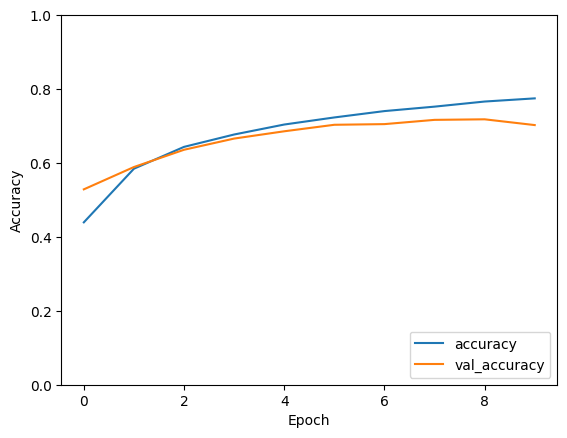

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()